<a href="https://colab.research.google.com/github/jamesvpham/DATA110/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/jamesvpham/DATA110/refs/heads/main/dataset/pokemon.csv")
df.head()

,Date,Time,Pokemon,Trainer Region,Trainer Subregion,Pokemon Region,Level,Level Met,Gender,Type1,Type2,Nature,Pokeball,Held Item,Perfect IVs
0,12/13/2016,17:28,Oricorio,South Korea,NaN,NaN,13,10,F,Electric,Flying,Sassy,Poke,F,0
1,12/13/2016,17:30,Zubat,United States,Texas,GER,8,8,M,Poison,Flying,Hardy,Poke,F,1
2,12/13/2016,17:31,Carbink,United States,Oklahoma,NaN,10,10,N,Rock,Fairy,Relaxed,Poke,F,0
3,12/13/2016,17:33,Klefki,United States,Connecticut,NaN,29,29,M,Steel,Fairy,Jolly,Quick,F,0
4,12/13/2016,17:34,Luvdisc,United States,NaN,NaN,16,16,M,Water,NaN,Naughty,Quick,F,0


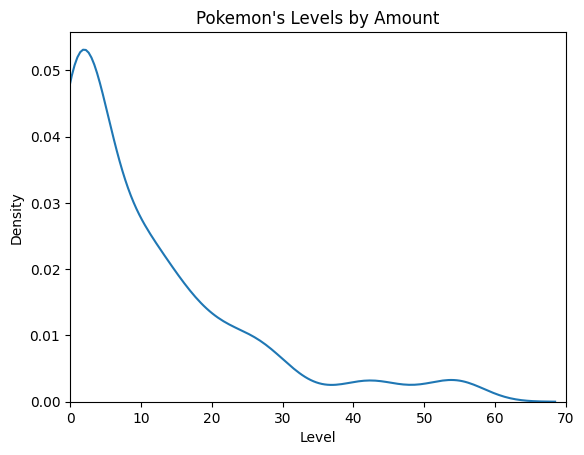

In [ ]:
# level density chart

sns.kdeplot(data = df["Level"])
plt.title("Pokemon's Levels by Amount")
plt.xlabel("Level")
plt.ylabel("Density")
plt.xlim(0, 70)
plt.show()

The above plot shows that there are considerably more pokemon that are between the levels of 1-10 than there are pokemon between the levels 20-70.

Questions about this dataset:
Which countries have the most pokemon?
How does a country's amount of pokemon affect the data comparison/relationship between another country?
Does a relationship exist between a pokemon's genders and their trainer's region?
Does a relationship exist between the type of pokeball used and a pokemon's level?
Does a relationship exist between the type of pokeball used and a pokemon's amount of perfect IVs?

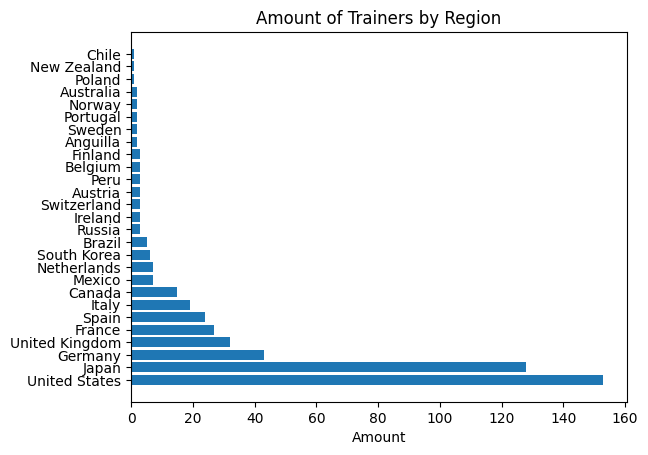

In [ ]:
# trainer regions by amount

species_counts = df['Trainer Region'].value_counts()
plt.barh(species_counts.index, species_counts.values)
plt.title("Amount of Trainers by Region")
plt.xlabel("Amount")
plt.show()

For the next portion of the project, I will use the U.S and Japan as the two regions for comparisons since they are the two largest by amount.

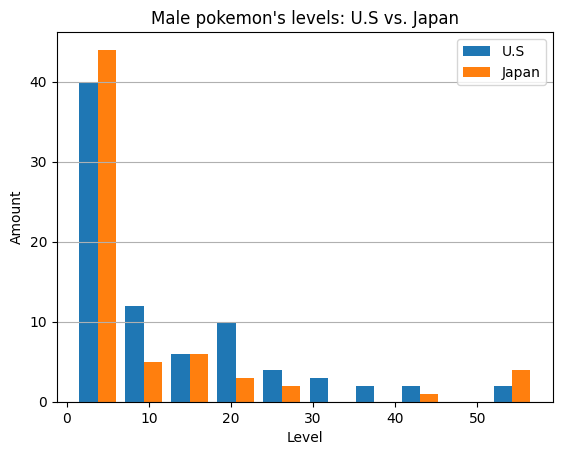

In [ ]:
# U.S & Japan's male pokemon level density comparisons
us_male = df[(df["Gender"] == "M") & (df["Trainer Region"] == "United States")]["Level"]
japan_male = df[(df["Gender"] == "M") & (df["Trainer Region"] == "Japan")]["Level"]

plt.hist([us_male, japan_male], label = ["U.S","Japan"])
plt.title("Male pokemon's levels: U.S vs. Japan")
plt.xlabel("Level")
plt.ylabel("Amount")
plt.legend()
plt.grid(axis = "y")
plt.show()

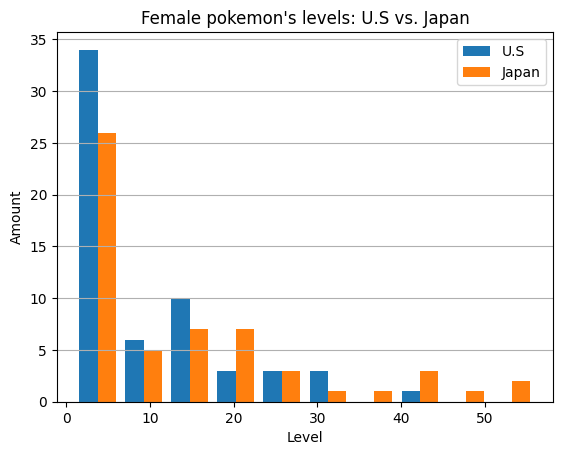

In [ ]:
# U.S & Japan's female pokemon level density comparisons
us_female = df[(df["Gender"] == "F") & (df["Trainer Region"] == "United States")]["Level"]
japan_female = df[(df["Gender"] == "F") & (df["Trainer Region"] == "Japan")]["Level"]

plt.hist([us_female, japan_female], label = ["U.S","Japan"])
plt.title("Female pokemon's levels: U.S vs. Japan")
plt.xlabel("Level")
plt.ylabel("Amount")
plt.legend()
plt.grid(axis = "y")
plt.show()

There are more male pokemon in Japan than the U.S although not by much. On the other side of the spectrum however, there are more female pokemon in the U.S than Japan. These two graphs once again reflect that most pokemon are between the 1-10 level range. But more importantly, from these two graphs we can safely assume that there is no relationship between gender and pokemon levels in the U.S and Japan.

In these next two graphs it show the means of perfect IVs and pokemon levels by pokeball used. We can assume that the master ball is the best option to choose when catching pokemon because the mean of the master ball's perfect IVs and the level is much higher than the others.

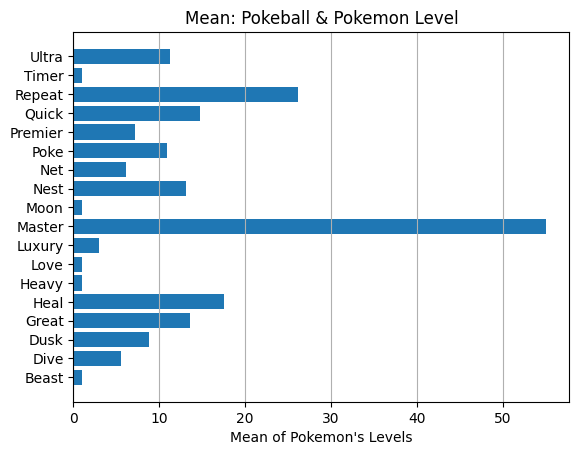

In [ ]:
# means of pokemons levels by pokeball used graph

pokeball_mean = df.groupby('Pokeball')['Level'].mean()

plt.barh(pokeball_mean.index, pokeball_mean.values)
plt.xlabel("Mean of Pokemon's Levels")
plt.title("Mean: Pokeball & Pokemon Level")
plt.grid(axis = "x")
plt.show()

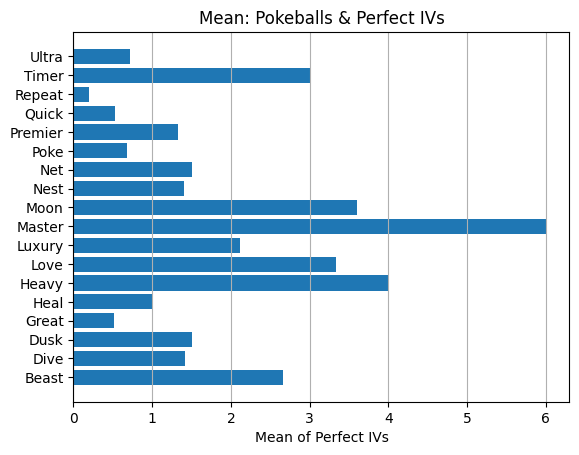

In [ ]:
# means of perfect IVs by pokeball used graph

pokeball_mean = df.groupby('Pokeball')['Perfect IVs'].mean()
plt.barh(pokeball_mean.index, pokeball_mean.values)
plt.xlabel("Mean of Perfect IVs")
plt.title("Mean: Pokeballs & Perfect IVs")
plt.grid(axis = "x")
plt.show()

This next graph shows the types of pokeballs by amount used. Now we know why the master ball had a higher mean of level and perfect IVs than the others. It's because the sample size is so small.

This highlights the importance of understanding the full context of a dataset before coming to a conclusion based off a few graphs. If we fail to recognize all of the data, we could make the wrong assumptions.  

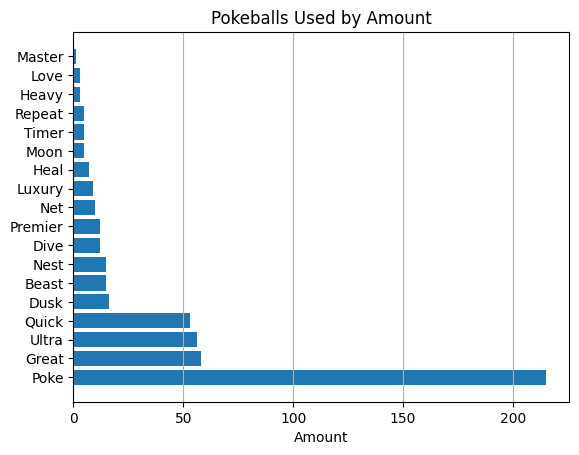

In [ ]:
# pokeballs used (to catch) by amount

species_counts = df['Pokeball'].value_counts()
plt.barh(species_counts.index, species_counts.values)
plt.title("Pokeballs Used by Amount")
plt.xlabel("Amount")
plt.grid(axis = "x")
plt.show()

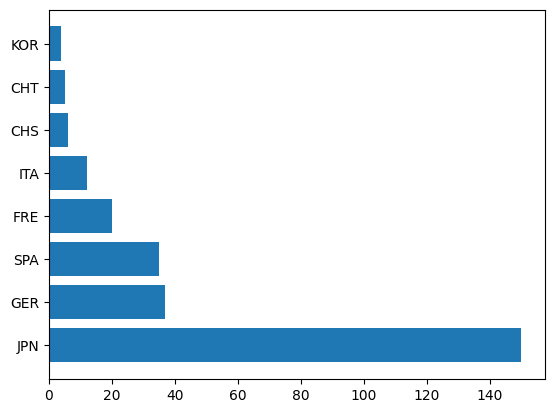

In [ ]:
# pokemon regions by amount of pokemon

species_counts = df['Pokemon Region'].value_counts()
#plt.pie(species_counts.values, labels = species_counts.index, autopct = '%1.2f%%')
plt.barh(species_counts.index, species_counts.values)
plt.show()

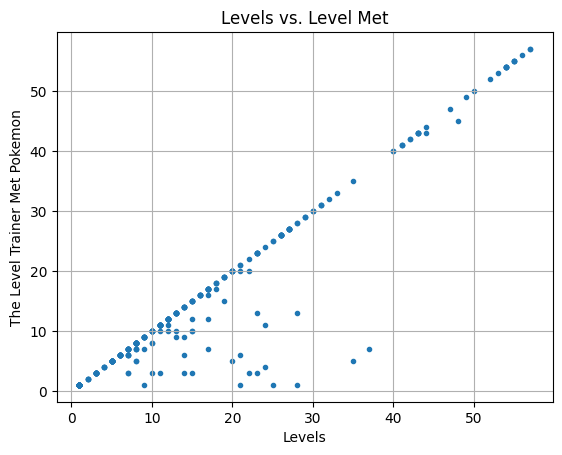

In [ ]:
# scatter plot to see trends
x_levels = df["Level"]
y_iv = df["Level Met"]

plt.scatter(x_levels, y_iv, marker = ".")
plt.xlabel("Levels")
plt.ylabel("The Level Trainer Met Pokemon")
plt.title("Levels vs. Level Met")
plt.grid()
plt.show()

This graph shows the relationship between the levels of the pokemon and the levels that their trainers met them. From the looks of this graph, we can assume that the majority of pokemons are the same level as when their trainers met them. There are a few that stray from the common trend, and these are the pokemon that have leveled up from when they first met their trainer. This is an example of a graph that is able to properly visualize the full story without missing any context.